In [9]:
L = 10.0
N = 5
Nbasis = 2*N + 1
grid_x = Array{Float64}(Nbasis)
for α = 1:Nbasis
    grid_x[α] = L/Nbasis*(α-N-1)
end
Δ = L/Nbasis
grid_x

11-element Array{Float64,1}:
 -4.54545 
 -3.63636 
 -2.72727 
 -1.81818 
 -0.909091
  0.0     
  0.909091
  1.81818 
  2.72727 
  3.63636 
  4.54545 

In [21]:
function eval_LF1d_p( α::Int64, L::Float64, grid_x::Array{Float64}, x)
    Nbasis = size(grid_x)[1]
    N = (Nbasis-1)/2
    f = 0.0
    for l = 1:Nbasis
        k = -N + (l-1)
        f = f + sqrt(1/L/Nbasis)*cos(2*pi*k*(x-grid_x[α])/L)
    end
    return f
end

eval_LF1d_p (generic function with 3 methods)

In [24]:
f1 = eval_LF1d_p( 1, L, grid_x, grid_x[2] )
f2 = eval_LF1d_p( 2, L, grid_x, grid_x[2] )
println(f1, " ", f2)

4.579669976578771e-16 1.0488088481701519


In [25]:
import PyPlot
const plt = PyPlot

PyPlot

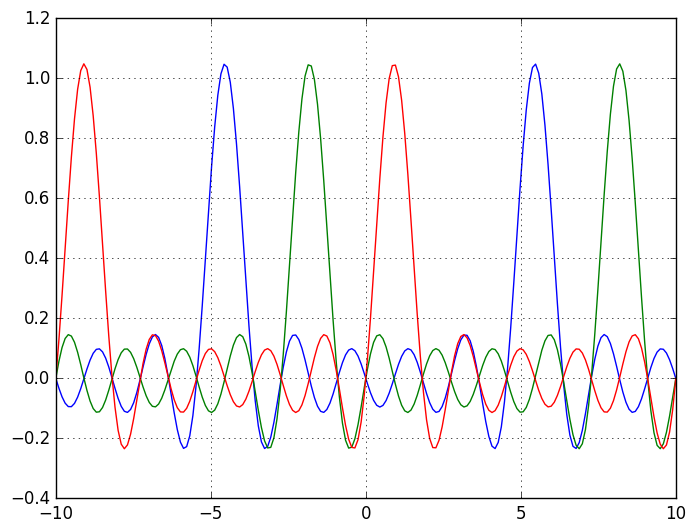

In [35]:
plt.clf()
NptsPlot = 200
x = Array{Float64}(linspace(-L,L,NptsPlot));

# Plot for basis function 1, 4, and 7
for α = [1,4,7]
    y = Array{Float64}(NptsPlot)
    for i = 1:size(x)[1]
        y[i] = eval_LF1d_p(α, L, grid_x, x[i])
    end
    plt.grid()
    plt.plot(x,y)
end

## Transformation matrix

In [39]:
# Transformation matrix
T = Array{Complex128}(Nbasis,Nbasis)
for α = 1:Nbasis
    for l = 1:Nbasis
        k = -N + (l-1)
        x = grid_x[α]
        T[α,l] = sqrt(1/Nbasis)*exp(2*pi*im*k*x/L)
    end
end
T

11×11 Array{Complex{Float64},2}:
 -0.0429095+0.298442im     0.125252-0.274264im   …  -0.0429095-0.298442im 
   0.125252-0.274264im    -0.289298+0.0849456im       0.125252+0.274264im 
  -0.197448+0.227867im     0.253647+0.163009im       -0.197448-0.227867im 
   0.253647-0.163009im   -0.0429095-0.298442im        0.253647+0.163009im 
  -0.289298+0.0849456im   -0.197448+0.227867im       -0.289298-0.0849456im
   0.301511-0.0im          0.301511-0.0im        …    0.301511+0.0im      
  -0.289298-0.0849456im   -0.197448-0.227867im       -0.289298+0.0849456im
   0.253647+0.163009im   -0.0429095+0.298442im        0.253647-0.163009im 
  -0.197448-0.227867im     0.253647-0.163009im       -0.197448+0.227867im 
   0.125252+0.274264im    -0.289298-0.0849456im       0.125252-0.274264im 
 -0.0429095-0.298442im     0.125252+0.274264im   …  -0.0429095+0.298442im 

In [42]:
# Test unitary property of transformation matrix
T' - inv(T)

11×11 Array{Complex{Float64},2}:
  1.31839e-16-9.4369e-16im   …   4.09395e-16+6.10623e-16im
 -4.44089e-16+3.33067e-16im     -3.33067e-16-2.22045e-16im
  6.66134e-16-1.11022e-16im      3.05311e-16+4.16334e-16im
 -2.22045e-16+2.77556e-16im     -3.33067e-16-1.94289e-16im
  3.88578e-16-1.38778e-17im      3.33067e-16+9.71445e-17im
 -2.77556e-16-1.11022e-16im  …  -2.77556e-16+1.38778e-17im
  3.88578e-16+0.0im              3.33067e-16+1.249e-16im  
 -1.66533e-16-1.94289e-16im     -3.33067e-16+1.94289e-16im
  4.71845e-16+2.77556e-16im      4.44089e-16-2.498e-16im  
   -4.996e-16-1.66533e-16im     -3.88578e-16+1.66533e-16im
  4.23273e-16+8.32667e-16im  …    3.1225e-16-8.32667e-16im

In [45]:
X_dvr = diagm(grid_x)

11×11 Array{Float64,2}:
 -4.54545   0.0       0.0      …  0.0      0.0      0.0      0.0    
  0.0      -3.63636   0.0         0.0      0.0      0.0      0.0    
  0.0       0.0      -2.72727     0.0      0.0      0.0      0.0    
  0.0       0.0       0.0         0.0      0.0      0.0      0.0    
  0.0       0.0       0.0         0.0      0.0      0.0      0.0    
  0.0       0.0       0.0      …  0.0      0.0      0.0      0.0    
  0.0       0.0       0.0         0.0      0.0      0.0      0.0    
  0.0       0.0       0.0         1.81818  0.0      0.0      0.0    
  0.0       0.0       0.0         0.0      2.72727  0.0      0.0    
  0.0       0.0       0.0         0.0      0.0      3.63636  0.0    
  0.0       0.0       0.0      …  0.0      0.0      0.0      4.54545

In [49]:
X = T' * X_dvr * T
println(size(X))
println(real(X))

(11, 11)
[1.9082e-17 9.36751e-17 -1.38778e-17 0.0 0.0 -6.93889e-18 0.0 0.0 -1.38778e-17 -1.73472e-17 1.9082e-17; 9.36751e-17 8.32667e-17 -4.16334e-17 0.0 0.0 0.0 0.0 0.0 6.93889e-17 8.32667e-17 -1.73472e-17; -1.38778e-17 2.77556e-17 2.77556e-17 -5.55112e-17 0.0 0.0 0.0 0.0 -2.77556e-17 2.77556e-17 -1.38778e-17; 0.0 2.77556e-17 0.0 -5.55112e-17 -1.38778e-17 0.0 1.38778e-17 -5.55112e-17 0.0 -2.77556e-17 -2.77556e-17; 0.0 0.0 0.0 1.38778e-17 -9.71445e-17 -5.55112e-17 -1.38778e-17 -1.38778e-17 0.0 0.0 -6.93889e-18; 0.0 0.0 0.0 0.0 -5.55112e-17 5.55112e-17 -5.55112e-17 0.0 0.0 0.0 -1.38778e-17; 0.0 0.0 0.0 -1.38778e-17 -1.38778e-17 -5.55112e-17 -9.71445e-17 1.38778e-17 0.0 0.0 -6.93889e-18; 0.0 -2.77556e-17 0.0 -5.55112e-17 1.38778e-17 0.0 -1.38778e-17 -5.55112e-17 0.0 2.77556e-17 2.77556e-17; -1.38778e-17 2.77556e-17 -2.77556e-17 0.0 0.0 0.0 0.0 -5.55112e-17 2.77556e-17 2.77556e-17 -1.38778e-17; -1.73472e-17 8.32667e-17 6.93889e-17 0.0 0.0 0.0 0.0 0.0 -4.16334e-17 8.32667e-17 9.36751e-17; 

In [61]:
real(X)
imag(T'*X_dvr*T)

11×11 Array{Float64,2}:
  0.0        1.61339      -0.840753      0.60145   …   0.840753     -1.61339 
 -1.61339    5.55112e-17   1.61339      -0.840753     -0.60145       0.840753
  0.840753  -1.61339      -8.32667e-17   1.61339       0.499703     -0.60145 
 -0.60145    0.840753     -1.61339       0.0          -0.45922       0.499703
  0.499703  -0.60145       0.840753     -1.61339       0.45922      -0.45922 
 -0.45922    0.499703     -0.60145       0.840753  …  -0.499703      0.45922 
  0.45922   -0.45922       0.499703     -0.60145       0.60145      -0.499703
 -0.499703   0.45922      -0.45922       0.499703     -0.840753      0.60145 
  0.60145   -0.499703      0.45922      -0.45922       1.61339      -0.840753
 -0.840753   0.60145      -0.499703      0.45922      -5.55112e-17   1.61339 
  1.61339   -0.840753      0.60145      -0.499703  …  -1.61339       0.0     

In [66]:
g1 = T*(T'*grid_x)

11-element Array{Complex{Float64},1}:
  -4.54545+1.11022e-16im
  -3.63636-1.38778e-16im
  -2.72727+0.0im        
  -1.81818+1.11022e-16im
 -0.909091-5.55112e-17im
       0.0+5.55112e-17im
  0.909091-5.55112e-17im
   1.81818+1.11022e-16im
   2.72727+0.0im        
   3.63636-1.38778e-16im
   4.54545+1.11022e-16im

In [69]:
abs.(g1 - grid_x)

11-element Array{Float64,1}:
 7.10629e-15
 4.65268e-16
 8.88178e-16
 2.44501e-15
 2.77611e-15
 5.55112e-17
 2.77611e-15
 2.44501e-15
 8.88178e-16
 4.65268e-16
 7.10629e-15

In [70]:
T*grid_x

11-element Array{Complex{Float64},1}:
          0.0-1.52306im
          0.0+1.65733im
          0.0-1.99478im
          0.0+2.78846im
 -2.22045e-16-5.35102im
  4.44089e-16+0.0im    
 -2.22045e-16+5.35102im
          0.0-2.78846im
          0.0+1.99478im
          0.0-1.65733im
          0.0+1.52306im

In [73]:
sort( imag(T'*grid_x) )

11-element Array{Float64,1}:
 -5.35102
 -2.78846
 -1.99478
 -1.65733
 -1.52306
  0.0    
  1.52306
  1.65733
  1.99478
  2.78846
  5.35102

In [75]:
xx = sort( imag(T*grid_x) );
xx[2] - xx[1]

2.5625579835159282

In [76]:
grid_x[2] - grid_x[1]

0.9090909090909087

In [78]:
abs.(T'*T)

11×11 Array{Float64,2}:
 1.0          9.02723e-17  1.84404e-16  …  7.43118e-16  1.49882e-15
 9.02723e-17  1.0          8.08411e-16     6.10623e-16  7.01043e-16
 1.84404e-16  8.08411e-16  1.0             3.78233e-16  2.67508e-16
 8.71688e-18  2.02302e-16  3.6835e-16      1.04314e-16  1.82148e-16
 3.29854e-17  1.97766e-16  3.62221e-17     7.98161e-17  1.5836e-16 
 1.70003e-16  9.02056e-17  9.71445e-17  …  9.02056e-17  1.83881e-16
 1.8562e-16   7.98161e-17  2.15357e-16     1.97766e-16  3.52777e-17
 1.89087e-16  1.04314e-16  4.64958e-16     2.02302e-16  1.56366e-17
 2.67508e-16  3.78233e-16  8.32667e-16     8.08411e-16  1.84404e-16
 7.43118e-16  6.10623e-16  3.78233e-16     1.0          7.70342e-17
 1.49882e-15  7.01043e-16  2.67508e-16  …  7.70342e-17  1.0        

## Function expansion

In [112]:
L = 10.0
N = 10
Nbasis = 2*N + 1
grid_x = Array{Float64}(Nbasis)
for α = 1:Nbasis
    grid_x[α] = L/Nbasis*(α-N-1)
end
Δ = L/Nbasis;

In [96]:
function myfunc(L::Float64, x::Float64)
    ω = 2*pi/L
    f = cos(ω*x)*sin(2*ω*x)
    return f
end

myfunc (generic function with 2 methods)

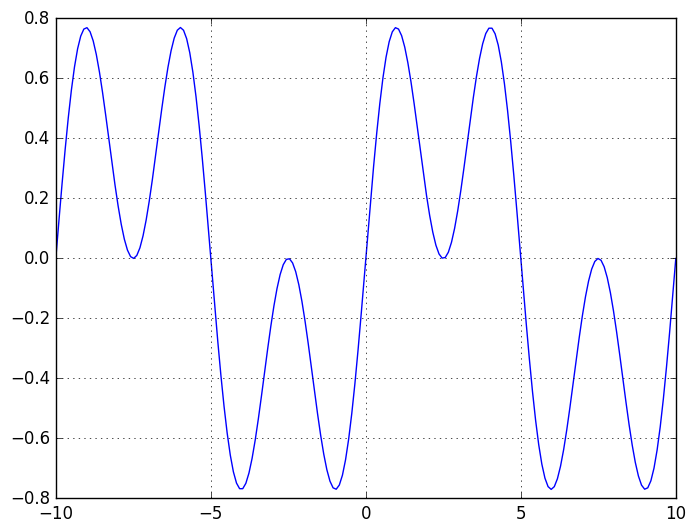

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2b9b43720d50>

In [97]:
NptsPlot = 200
x = Array{Float64}(linspace(-L,L,NptsPlot));
y = Array{Float64}(NptsPlot)
for i = 1:NptsPlot
    y[i] = myfunc(L,x[i])
end
plt.clf()
plt.grid()
plt.plot(x,y)

In [113]:
ex_coefs = Array{Float64}(Nbasis)
for i = 1:Nbasis
    ex_coefs[i] = myfunc(L, grid_x[i])
end

In [114]:
function eval_from_ex_coefs( ex_coef::Array{Float64}, L, grid_x, x )
    f = 0.0
    for i = 1:Nbasis
        f = f + ex_coef[i]*eval_LF1d_p( i, L, grid_x, x )
    end
    return f
end

eval_from_ex_coefs (generic function with 1 method)

In [116]:
eval_from_ex_coefs( ex_coefs, L, grid_x, grid_x[1] ), myfunc(L, grid_x[1])

(-0.20112857994911162, -0.29146300264686675)

In [101]:
NptsPlot = 200
x = Array{Float64}(linspace(-L,L,NptsPlot));
y1 = Array{Float64}(NptsPlot)
y2 = Array{Float64}(NptsPlot)
for i = 1:NptsPlot
    y1[i] = myfunc(L,x[i])
    y2[i] = eval_from_ex_coefs( ex_coefs, L, grid_x, x[i])
end
plt.clf()
plt.grid()
plt.plot(x,y1)
plt.plot(x,y2)

LoadError: [91mMethodError: Cannot `convert` an object of type Void to an object of type Float64
This may have arisen from a call to the constructor Float64(...),
since type constructors fall back to convert methods.[39m